https://theailearner.com/tag/cv2-laplacian/

In [ ]:
Titlu = "Edge Detection using Laplacian"
StudentName1 = "Kinzerska Iryna"
StudentName2 = "Vanca Rafael"
StudentSpecialization = "EA romana"
print(Titlu)
print("This work is realised by:")
print(StudentName1,",",StudentName2, " - " , StudentSpecialization)

Edge Detection using Laplacian
This work is realised by:
Kinzerska Iryna , Vanca Rafael  -  EA romana


Exemplu de edge detection cu Laplacian operator of second order folosind OpenCv

Laplacian()

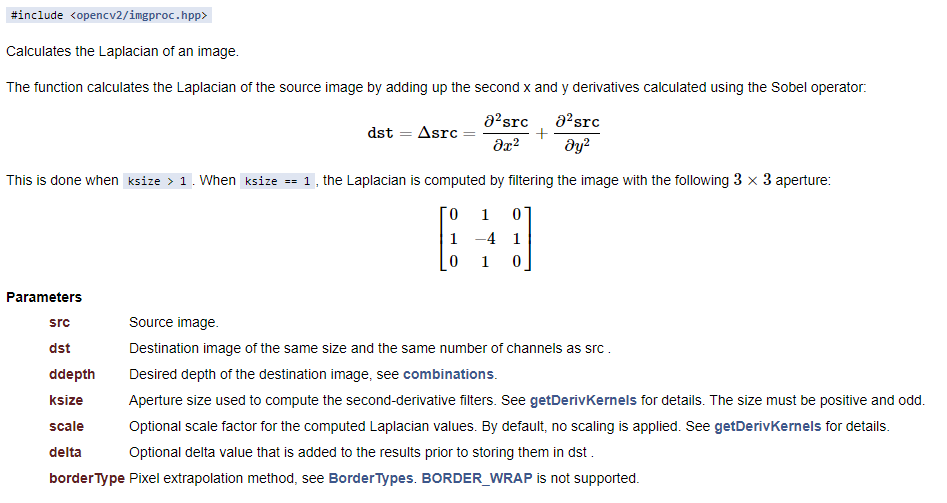

In [ ]:
 from IPython.display import Image
 Image("laplacian_opencv.PNG", width=550, height=400)

Importam librariile necesare:

In [ ]:
import cv2
import matplotlib.pyplot as plt

Citim imaginea:

In [ ]:
InputIm_FileName="duck.png"
img=cv2.imread(InputIm_FileName)
print(img.dtype)

uint8


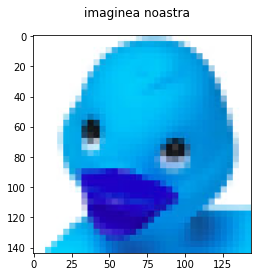

In [ ]:
plt.figure()
plt.imshow(img)
plt.suptitle('imaginea noastra')
plt.show()

Convertim din BGR in GRAY:

In [ ]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


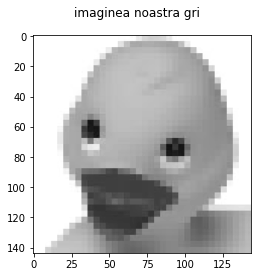

In [ ]:
plt.figure()
plt.imshow(img_grey, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea noastra gri')
plt.show()

Bluram imaginea cu Gaussian ca sa scapam de zgomot:

In [ ]:
blurata = cv2.GaussianBlur(img_grey,(13,13),0)


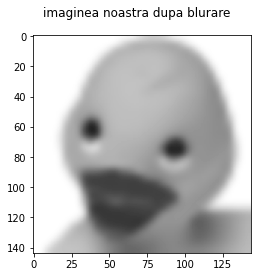

In [ ]:
plt.figure()
plt.imshow(blurata, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea noastra dupa blurare')
plt.show()

Aplicam Laplacian de ordinul 2

Syntax: cv2.Laplacian(src, ddepth[, ksize[, scale[, delta[, borderType]]]]])


In [ ]:
edges = cv2.Laplacian(blurata, -1, ksize=3,
                      scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)


Afisam imaginea:

In [ ]:
import numpy as np

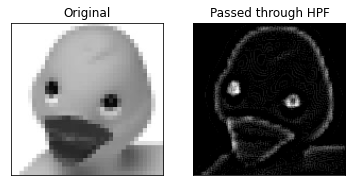

In [ ]:
output = [img_grey, edges]
titles = ['Original', 'Passed through HPF']

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

Implementarea manuala a convolutilor

For convolutions we use filter2D function.



Syntax: filter2D (src, dst, ddepth, kernel)


Parameters:  


Src – The source image to apply the filter on.

Dst – Name of the output image after applying the filter

Ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]

Kernel – The 2d matrix we want the image to convolve with.

Gaussian blur:

-generate kernel

-convolution with kernel

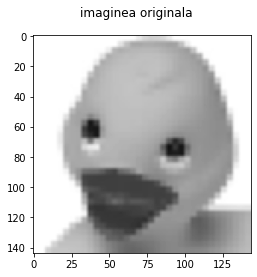

In [ ]:
gaussian_kernel = np.array([[1, 2, 1], 
                         [2, 4, 2], 
                         [1, 2, 1]]) / 16

blurred = cv2.filter2D(img_grey, -1, kernel=gaussian_kernel)

plt.figure()
plt.imshow(blurred, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea originala')
plt.show()

Laplacian:

-kernel

-application of kernel (convolution)

Masca pe care o folosim:

In [ ]:
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

In [ ]:
laplacian2 = np.array([[-1, 2, -1], 
                      [2, -4, 2], 
                      [-1, 2, -1]])

In [ ]:
laplacian3 = np.array([[-2,  0, -2],
                      [ 0,  8,  0],
                      [-2,  0, -2]])

Convolutia:

int64


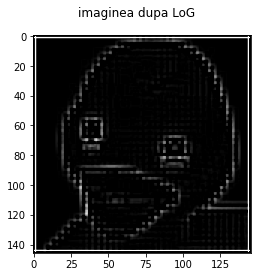

In [ ]:
from scipy.signal import convolve2d

result = convolve2d(blurred, laplacian3)
print(result.dtype)

plt.figure()
plt.imshow(result, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea dupa LoG')
plt.show()

Laplacian of Gaussian masca hybrid:

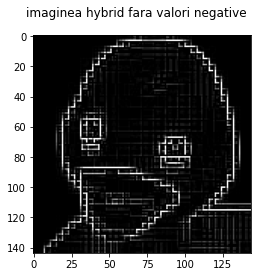

In [ ]:
from scipy.ndimage import convolve

gauss = np.array([[1,2,1],[2,4,2],[1,2,1]])
laplac = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
signal = convolve(gauss, laplac)

result3 = cv2.filter2D(img_grey, -1, signal)

plt.figure()
plt.imshow(result3, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea hybrid fara valori negative')
plt.show()

In [ ]:
LoG_kernel = np.array([
                        [0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2,-16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]
                    ])

int64


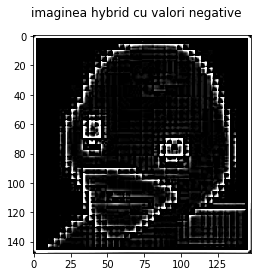

In [ ]:
from scipy.signal import convolve2d

result1 = convolve2d(img_grey, LoG_kernel)

print(result1.dtype)

plt.figure()
plt.imshow(result1, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('imaginea hybrid cu valori negative')
plt.show()

In [ ]:
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
#result1

Implementare functii:

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pylab
from matplotlib.widgets import Slider
from google.colab.patches import cv2_imshow

Zero-crossings:

In [ ]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data    

def any_neighbor_zero(img, i, j):
    for k in range(-1,2):
      for l in range(-1,2):
         if img[i+k, j+k] == 0:
            return True
    return False

def zero_crossing(img):
    img[img > 0] = 1
    img[img < 0] = 0
    out_img = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if img[i,j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i,j] = 255
    return out_img

zc = zero_crossing(result)

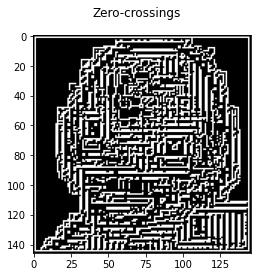

In [ ]:
plt.figure()
plt.imshow(zc, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('Zero-crossings')
plt.show()

Eliminate the weak edges in our image, and only consider the strong edges. This is done by preserving the edges observed in both LoG and Sobel operated edges, and eliminating all other weak edges in LoG.
 
logical AND of the two images:

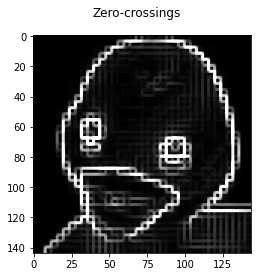

In [ ]:
sobelx = cv2.Sobel(img_grey, cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img_grey, cv2.CV_64F,0,1,ksize=3)

sobel_first_derivative = cv2.magnitude(sobelx,sobely)

plt.figure()
plt.imshow(sobel_first_derivative, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('Zero-crossings')
plt.show()

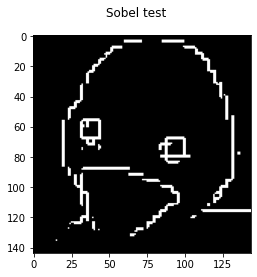

In [ ]:
sobel_test = np.empty_like (sobel_first_derivative)
sobel_test[:] = sobel_first_derivative

sobel_test[sobel_test > 200] = 255
sobel_test[sobel_test < 200] = 0

plt.figure()
plt.imshow(sobel_test, cmap = 'gray', vmin=0,vmax=255)
plt.suptitle('Sobel test')
plt.show()

Our Array 1 type... int64
Our Array 2 type... int64
Our Array 1 Dimensions... 2
Our Array 2 Dimensions... 2
Our Array 1 Shape... (146, 146)
Our Array 2 Shape... (146, 146)


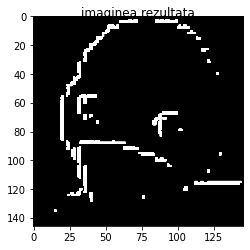

In [ ]:
arr1 = zc
arr2 = sobel_test

arr1 = zc.astype(np.int64)
arr2 = sobel_test.astype(np.int64)

arr2 = np.pad(arr2, [(0, 2), (0, 2)], mode='constant')

# Display the arrays
#print("Array 1...", arr1)
#print("Array 2...", arr2)


# Get the type of the arrays
print("Our Array 1 type...", arr1.dtype)
print("Our Array 2 type...", arr2.dtype)

# Get the dimensions of the Arrays
print("Our Array 1 Dimensions...",arr1.ndim)
print("Our Array 2 Dimensions...",arr2.ndim)

# Get the shape of the Arrays
print("Our Array 1 Shape...",arr1.shape)
print("Our Array 2 Shape...",arr2.shape)

# To compute the bit-wise AND of two arrays element-wise, use the numpy.bitwise_and() method in Python Numpy
ultima = np.bitwise_and(arr1, arr2)

plt.figure()
plt.imshow(ultima, cmap = 'gray', vmin=0,vmax=1)
plt.suptitle('imaginea rezultata')
plt.show()

#print("Array ...", ultima)

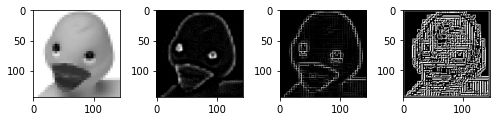

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True



plt.subplot(1, 4, 1)
plt.imshow(img_grey, cmap="gray")

plt.subplot(1, 4, 2)
plt.imshow(edges, cmap="gray")

plt.subplot(1, 4, 3)
plt.imshow(result3, cmap="gray")

plt.subplot(1, 4, 4)
plt.imshow(zc, cmap="gray")

plt.show()